In [1]:
import gzip
import os
import sys
import urllib
import matplotlib.image as mpimg
from PIL import Image

import code

import tensorflow.python.platform
import sys
import numpy
import tensorflow as tf
import argparse
import numpy as np
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.layers import Conv2D
from helpers import *
from constants import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from NNmodels import *



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-12-19 13:56:51.802597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


RuntimeError: This version of jaxlib was built using AVX instructions, which your CPU and/or operating system do not support. This error is frequently encountered on macOS when running an x86 Python installation on ARM hardware. In this case, try installing an ARM build of Python. Otherwise, you may be able work around this issue by building jaxlib from source.

# Data extraction and splitting

In [7]:
data_dir = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/training/'
data_filename = data_dir + "images/"
labels_filename = data_dir + "groundtruth/"

data = extract_data(data_filename, TRAINING_SIZE)
labels = extract_labels(labels_filename, TRAINING_SIZE)

In [8]:
# data splitting
train_split = 0.7
val_split = 0.15
test_split = 0.15

train_data = data[:int(train_split * len(data))]
train_labels = labels[:int(train_split * len(labels))]
val_data = data[int(train_split * len(data)) : int((train_split + val_split) * len(data))]
val_labels = labels[int(train_split * len(labels)) : int((train_split + val_split) * len(labels))]
test_data = data[int((train_split + val_split) * len(data)):]
test_labels = labels[int((train_split + val_split) * len(labels)):]




In [13]:
# Balance the classes.
print("Balancing training data...")
c0 = np.sum(train_labels[:, 0] == 1) # Count the number of data points in class 0
c1 = np.sum(train_labels[:, 1] == 1) # Count the number of data points in class 1
print(f"Number of data points per class: c0 = {c0}, c1 = {c1}")
min_c = min(c0, c1)
idx0 = np.where(train_labels[:, 0] == 1)[0][:min_c] # Get the indices of the first class
idx1 = np.where(train_labels[:, 1] == 1)[0][:min_c] # Get the indices of the second class
balanced_indices = np.concatenate([idx0, idx1]) 
train_data = train_data[balanced_indices] 
train_labels = train_labels[balanced_indices]
    
print(f"Balanced dataset size: {train_data.shape[0]}")

Balancing training data...
Number of data points per class: c0 = 8154, c1 = 2783
Balanced dataset size: 5566


In [ ]:
model = BasicModel((IMG_PATCH_SIZE, IMG_PATCH_SIZE, NUM_CHANNELS), NUM_LABELS)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
 # Step 3: Greate Generators
train_datagen = ImageDataGenerator(
            #rotation_range=180,
            horizontal_flip=True,
            vertical_flip=True)

validation_datagen = ImageDataGenerator()
            #rotation_range=180,
            #horizontal_flip=True,
            #vertical_flip=True)
            
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
validation_generator = validation_datagen.flow(val_data, val_labels, batch_size=32)

In [17]:
history = model.fit(
    train_data, train_labels,
    validation_data=(val_data, val_labels),
    epochs=30,  # Adjust the number of epochs based on your data
    batch_size=32,  # Adjust the batch size based on your hardware
    verbose=1  # Use 1 for progress bar display, 2 for one-line per epoch
)

Epoch 1/30


/Users/maelynenguyen/opt/anaconda3/envs/MLCourse1/lib/python3.10/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


174/174 [==============================] - 3s 9ms/step - loss: 0.8289 - accuracy: 0.6064 - val_loss: 0.6717 - val_accuracy: 0.6177
Epoch 2/30
174/174 [==============================] - 1s 8ms/step - loss: 0.6413 - accuracy: 0.6692 - val_loss: 0.7115 - val_accuracy: 0.5239
Epoch 3/30
174/174 [==============================] - 1s 8ms/step - loss: 0.5875 - accuracy: 0.6944 - val_loss: 0.6901 - val_accuracy: 0.5913
Epoch 4/30
174/174 [==============================] - 1s 8ms/step - loss: 0.5598 - accuracy: 0.7165 - val_loss: 0.5885 - val_accuracy: 0.6881
Epoch 5/30
174/174 [==============================] - 2s 9ms/step - loss: 0.5347 - accuracy: 0.7319 - val_loss: 0.5667 - val_accuracy: 0.6980
Epoch 6/30
174/174 [==============================] - 1s 8ms/step - loss: 0.5091 - accuracy: 0.7508 - val_loss: 0.5457 - val_accuracy: 0.7133
Epoch 7/30
174/174 [==============================] - 1s 8ms/step - loss: 0.4842 - accuracy: 0.7747 - val_loss: 0.6563 - val_accuracy: 0.6497
Epoch 8/30
174/17

# Predictions

In [18]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels, batch_size=32, verbose=1)


74/74 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.7474


In [19]:
predictions = model.predict(test_data)

74/74 [==============================] - 0s 3ms/step


In [20]:
predictions

array([[8.7983805e-01, 1.2016202e-01],
       [9.0985662e-01, 9.0143353e-02],
       [9.9990368e-01, 9.6368000e-05],
       ...,
       [9.9984109e-01, 1.5889009e-04],
       [9.9981207e-01, 1.8789862e-04],
       [8.8061655e-01, 1.1938342e-01]], dtype=float32)

In [21]:
one_hot_encoded = np.zeros_like(predictions)  # Create an array of zeros with the same shape
one_hot_encoded[np.arange(predictions.shape[0]), np.argmax(predictions, axis=1)] = 1  # Set max index to 1


In [22]:
one_hot_encoded



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# On test data

46/46 [==============================] - 0s 3ms/step


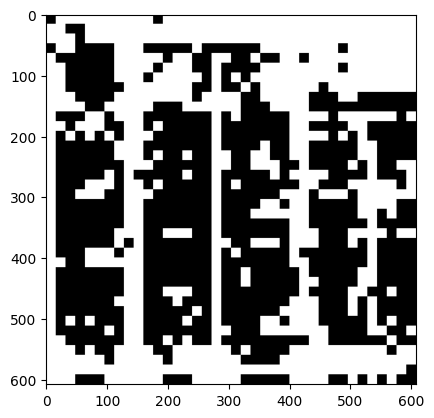

In [25]:
test_path = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/test_set_images/'
test_im_1 = mpimg.imread(test_path + 'test_1/test_1.png')
# cut into patches
test_patches = img_crop(test_im_1, IMG_PATCH_SIZE, IMG_PATCH_SIZE)
# predict
test_patches = np.array(test_patches)
test_predictions = model.predict(test_patches)
# one hot encoding
one_hot_encoded = np.zeros_like(test_predictions)
one_hot_encoded[np.arange(test_predictions.shape[0]), np.argmax(test_predictions, axis=1)] = 1
# reconstruct the image
reconstructed_image = np.zeros(test_im_1.shape)
idx = 0
for i in range(0, test_im_1.shape[1], IMG_PATCH_SIZE):
    for j in range(0, test_im_1.shape[0], IMG_PATCH_SIZE):
        reconstructed_image[j:j+IMG_PATCH_SIZE, i:i+IMG_PATCH_SIZE] = one_hot_encoded[idx][1]
        idx += 1
plt.imshow(reconstructed_image, cmap='gray')

# Predict and reconstruct image

46/46 [==============================] - 0s 3ms/step


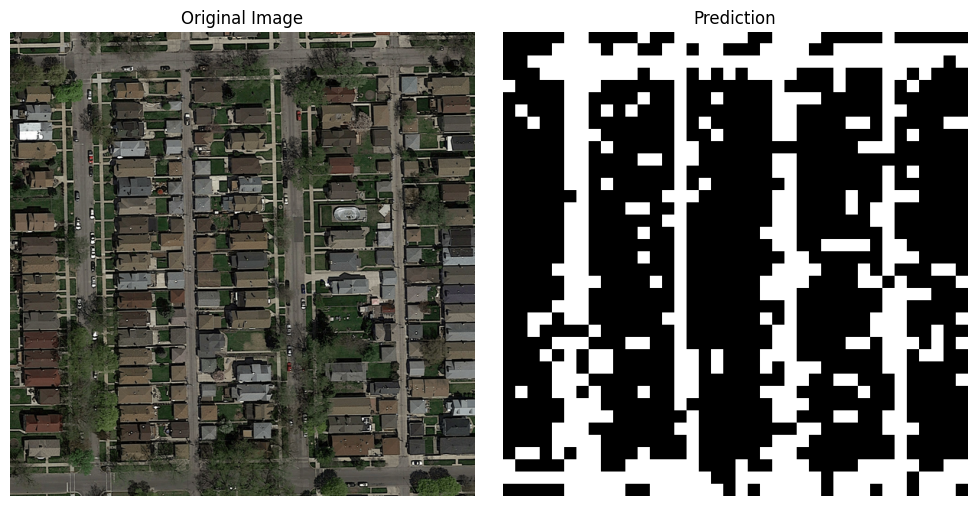

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

# Define constants (example, adjust as necessary)
IMG_PATCH_SIZE = 16  # Size of the patches
test_path = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/test_set_images/'


# Function to process a single test image and reconstruct predictions
def process_and_reconstruct(test_image_path):
    # Load the test image
    test_im = mpimg.imread(test_image_path)

    # Split the image into patches
    test_patches = img_crop(test_im, IMG_PATCH_SIZE, IMG_PATCH_SIZE)

    # Make predictions for each patch
    test_patches = np.array(test_patches)  # Convert to numpy array
    test_predictions = model.predict(test_patches)

    # One-hot encode predictions (assuming 2 classes)
    one_hot_encoded = np.zeros_like(test_predictions)
    one_hot_encoded[np.arange(test_predictions.shape[0]), np.argmax(test_predictions, axis=1)] = 1

    # Reconstruct the predicted image from the patches
    reconstructed_image = np.zeros(test_im.shape[:2])  # Empty image for reconstruction
    idx = 0
    for i in range(0, test_im.shape[1], IMG_PATCH_SIZE):
        for j in range(0, test_im.shape[0], IMG_PATCH_SIZE):
            reconstructed_image[j:j+IMG_PATCH_SIZE, i:i+IMG_PATCH_SIZE] = one_hot_encoded[idx][1]
            idx += 1
    
    return test_im, reconstructed_image

# Test the function on a single image
id = 30
test_im_path = test_path + f'test_{id}/test_{id}.png'
original_image, reconstructed_prediction = process_and_reconstruct(test_im_path)

# Plot the original and predicted images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axes

# Display the reconstructed prediction
axes[1].imshow(reconstructed_prediction, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Prediction')
axes[1].axis('off')  # Turn off axes

plt.tight_layout()
plt.show()


In [30]:
from mask_to_submission import *

In [34]:
for i in range(1,51):
    test_im_path = test_path + f'test_{id}/test_{id}.png'
    original_image, reconstructed_prediction = process_and_reconstruct(test_im_path)
    
    prediction_dir = '/Users/maelynenguyen/Desktop/MLproj2-1/predictions'
    plt.imsave(os.path.join(prediction_dir, 'prediction_' + '%.3d' % i + '.png'), reconstructed_prediction, cmap='gray')
    
    

46/46 [==============================] - 0s 6ms/step


In [35]:
image_filenames = []
for i in range(1, 51):
    image_filename = f'/Users/maelynenguyen/Desktop/MLproj2-1/predictions/prediction_' + '%.3d' % i + '.png' 
    image_filenames.append(image_filename)

submission_filename = "prediction_sub.csv"
masks_to_submission(submission_filename, *image_filenames)
